In [82]:
import pandas as pd

d = pd.read_csv('../data/targets.csv')
print(d)

                 StartTime  StationId  NumberOfVehicles
0      2020-04-01 00:00:00        101                28
1      2020-04-01 00:00:00        102                44
2      2020-04-01 00:15:00        102                40
3      2020-04-01 00:15:00        101                22
4      2020-04-01 00:30:00        101                15
...                    ...        ...               ...
34799  2020-09-30 23:15:00        101                52
34800  2020-09-30 23:30:00        102                89
34801  2020-09-30 23:30:00        101                43
34802  2020-09-30 23:45:00        102                68
34803  2020-09-30 23:45:00        101                64

[34804 rows x 3 columns]


In [83]:
print(d['StationId'].unique())

[101 102]


In [84]:
# number of samples from each StationId are not the same!
print('StationId 101 # of samples: ', len(d[d['StationId'] == 101]))
print('StationId 102 # of samples: ', len(d[d['StationId'] == 102]))

StationId 101 # of samples:  17386
StationId 102 # of samples:  17418


In [85]:
from utils import *

# we use a helper function to (1) remove time samples where only
# one of the sensors is working, and (2) sum up vehicle counts
# from both sensors
d = groupby_stationid(d)
print(d)

                StartTime  NumberOfVehicles
0     2020-04-01 00:00:00              72.0
1     2020-04-01 00:15:00              62.0
2     2020-04-01 00:30:00              49.0
3     2020-04-01 00:45:00              41.0
4     2020-04-01 01:00:00              46.0
...                   ...               ...
17300 2020-09-30 22:45:00             215.0
17301 2020-09-30 23:00:00             159.0
17302 2020-09-30 23:15:00             148.0
17303 2020-09-30 23:30:00             132.0
17304 2020-09-30 23:45:00             132.0

[17305 rows x 2 columns]


In [89]:
d2 = pd.read_csv('../data/features.csv')
print(d2)

                 StartTime  Band  CellId  PL_00  PL_01  PL_02  PL_03  PL_04  \
0      2020-08-01 00:00:00  2600      20    0.0    0.0    0.0    0.0    0.0   
1      2020-08-01 00:00:00  1800      21    0.0    0.0    0.0    0.0    0.0   
2      2020-08-01 00:00:00   800      22    0.0    0.0    0.0    0.0    0.0   
3      2020-08-01 00:00:00  1800      24    0.0    0.0    0.0    0.0    0.0   
4      2020-08-01 00:15:00  2600      20    0.0    0.0    0.0    0.0    0.0   
...                    ...   ...     ...    ...    ...    ...    ...    ...   
23411  2020-09-30 23:30:00  1800      24    0.0    0.0    0.0    0.0    0.0   
23412  2020-09-30 23:45:00  2600      20    0.0    0.0    0.0    0.0    0.0   
23413  2020-09-30 23:45:00  1800      21    0.0    0.0    0.0    0.0    0.0   
23414  2020-09-30 23:45:00   800      22    0.0    0.0    0.0    0.0    2.0   
23415  2020-09-30 23:45:00  1800      24    0.0    0.0    0.0    0.0    0.0   

       PL_05  PL_06  ...    PL_11     PL_12    PL_1

In [90]:
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23416 entries, 0 to 23415
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  23416 non-null  object 
 1   Band       23416 non-null  int64  
 2   CellId     23416 non-null  int64  
 3   PL_00      23408 non-null  float64
 4   PL_01      23408 non-null  float64
 5   PL_02      23408 non-null  float64
 6   PL_03      23408 non-null  float64
 7   PL_04      23408 non-null  float64
 8   PL_05      23408 non-null  float64
 9   PL_06      23408 non-null  float64
 10  PL_07      23408 non-null  float64
 11  PL_08      23408 non-null  float64
 12  PL_09      23408 non-null  float64
 13  PL_10      23408 non-null  float64
 14  PL_11      23408 non-null  float64
 15  PL_12      23408 non-null  float64
 16  PL_13      23408 non-null  float64
 17  PL_14      23408 non-null  float64
 18  PL_15      23408 non-null  float64
 19  PL_16      23408 non-null  float64
 20  PL_17 

In [91]:
d2['StartTime'] = pd.to_datetime(d2['StartTime'])
d2 = d2.dropna()
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23408 entries, 0 to 23415
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  23408 non-null  datetime64[ns]
 1   Band       23408 non-null  int64         
 2   CellId     23408 non-null  int64         
 3   PL_00      23408 non-null  float64       
 4   PL_01      23408 non-null  float64       
 5   PL_02      23408 non-null  float64       
 6   PL_03      23408 non-null  float64       
 7   PL_04      23408 non-null  float64       
 8   PL_05      23408 non-null  float64       
 9   PL_06      23408 non-null  float64       
 10  PL_07      23408 non-null  float64       
 11  PL_08      23408 non-null  float64       
 12  PL_09      23408 non-null  float64       
 13  PL_10      23408 non-null  float64       
 14  PL_11      23408 non-null  float64       
 15  PL_12      23408 non-null  float64       
 16  PL_13      23408 non-null  float64      

In [92]:
print(d2['CellId'].unique())

[20 21 22 24]


In [93]:
print('CellId 20 # of samples: ', len(d2[d2['CellId'] == 20]))
print('CellId 21 # of samples: ', len(d2[d2['CellId'] == 21]))
print('CellId 22 # of samples: ', len(d2[d2['CellId'] == 22]))
print('CellId 24 # of samples: ', len(d2[d2['CellId'] == 24]))

CellId 20 # of samples:  5852
CellId 21 # of samples:  5852
CellId 22 # of samples:  5852
CellId 24 # of samples:  5852


In [94]:
# since features are only available for August and 
# September, we'll filter those two months from targets
d = d.set_index('StartTime').loc['2020-08-01':'2020-09-30'].reset_index()
print(d)

               StartTime  NumberOfVehicles
0    2020-08-01 00:00:00             267.0
1    2020-08-01 00:15:00             244.0
2    2020-08-01 00:30:00             223.0
3    2020-08-01 00:45:00             208.0
4    2020-08-01 01:00:00             220.0
...                  ...               ...
5739 2020-09-30 22:45:00             215.0
5740 2020-09-30 23:00:00             159.0
5741 2020-09-30 23:15:00             148.0
5742 2020-09-30 23:30:00             132.0
5743 2020-09-30 23:45:00             132.0

[5744 rows x 2 columns]


In [95]:
# as a baseline, we'll create a model that estimate vehicle counts based on cyclic
# time features; first we create time cyclical time features using bit of trigonometry;
# we'll also encode weekends

import numpy as np

minutes_in_day = 24. * 60
minutes = d['StartTime'].dt.hour * 60 + d['StartTime'].dt.minute
d['SinTime'] = np.sin(2. * np.pi * minutes / minutes_in_day)
d['CosTime'] = np.cos(2. * np.pi * minutes / minutes_in_day)
d['isWeekend'] = (d['StartTime'].dt.weekday > 4).astype(int)
print(d)

               StartTime  NumberOfVehicles   SinTime   CosTime  isWeekend
0    2020-08-01 00:00:00             267.0  0.000000  1.000000          1
1    2020-08-01 00:15:00             244.0  0.065403  0.997859          1
2    2020-08-01 00:30:00             223.0  0.130526  0.991445          1
3    2020-08-01 00:45:00             208.0  0.195090  0.980785          1
4    2020-08-01 01:00:00             220.0  0.258819  0.965926          1
...                  ...               ...       ...       ...        ...
5739 2020-09-30 22:45:00             215.0 -0.321439  0.946930          0
5740 2020-09-30 23:00:00             159.0 -0.258819  0.965926          0
5741 2020-09-30 23:15:00             148.0 -0.195090  0.980785          0
5742 2020-09-30 23:30:00             132.0 -0.130526  0.991445          0
5743 2020-09-30 23:45:00             132.0 -0.065403  0.997859          0

[5744 rows x 5 columns]


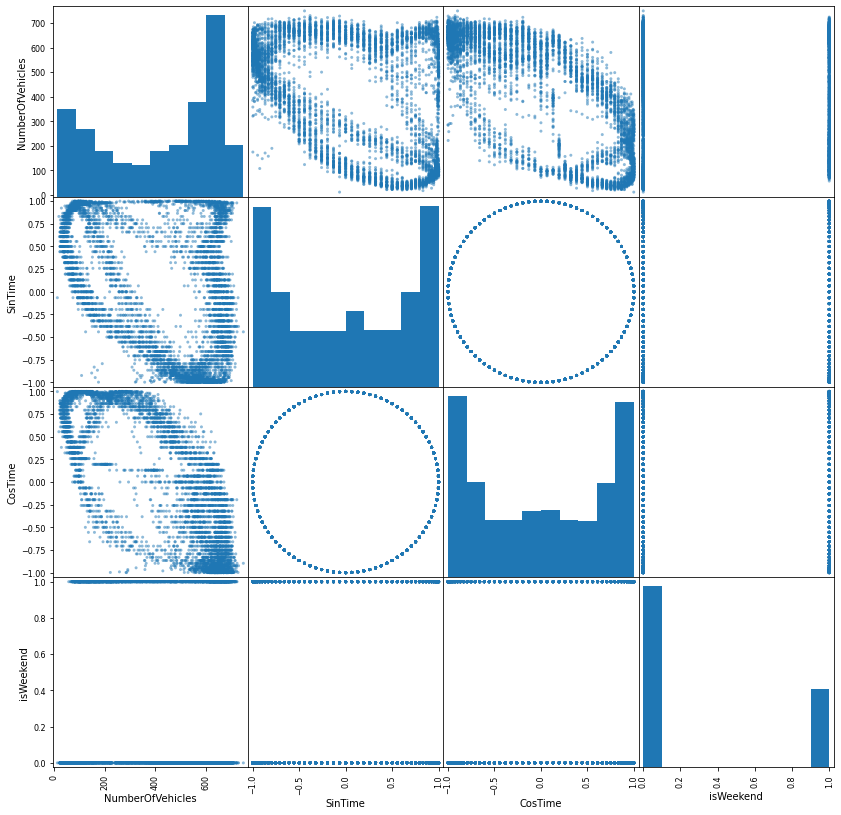

In [96]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(d, grid=True, figsize=(14, 14))
plt.show()

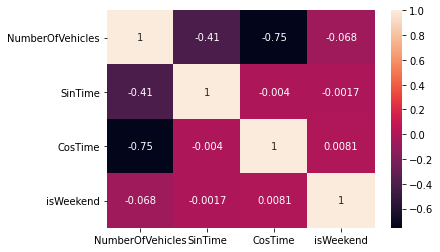

In [97]:
import seaborn as sns

# we can see strong (negative) linear correlation between
# vehicle counts and sine/cosine time components
sns.heatmap(d.corr(), annot=True)
plt.show()

In [98]:
d = d.set_index('StartTime')
X = d[['SinTime', 'CosTime', 'isWeekend']]
y = d['NumberOfVehicles']

# train/validate/test split
# first 6 weeks is train, then 1 week validate, and 1.5 weeks test
X_train = X.loc['2020-08-01':'2020-09-12']
y_train = y.loc['2020-08-01':'2020-09-12']
X_val = X.loc['2020-09-13':'2020-09-20']
y_val = y.loc['2020-09-13':'2020-09-20']
X_test = X.loc['2020-09-21':'2020-09-30']
y_test = y.loc['2020-09-21':'2020-09-30']

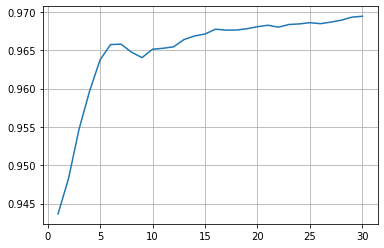

In [104]:
from sklearn.neighbors import KNeighborsRegressor

Ks = range(1, 31)
R2s = []
for k in Ks:
    neigh = KNeighborsRegressor(n_neighbors=k)
    R2s.append(neigh.fit(X_train, y_train).score(X_val, y_val))

plt.plot(Ks, R2s)
plt.grid()
plt.show()

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# k = 5 was optimal
k = 5
neigh = KNeighborsRegressor(n_neighbors=k)
neigh.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
predicted = neigh.predict(X_test)
print('*** KNeighborsRegressor (K={}) ***'.format(k))
print('MAE = ', mean_absolute_error(y_test, predicted))
print('MSE = ', mean_squared_error(y_test, predicted))
print('R2  = ', r2_score(y_test, predicted))

*** KNeighborsRegressor (K=5) ***
MAE =  40.3307855626327
MSE =  3747.102250530786
R2  =  0.9347693775797477


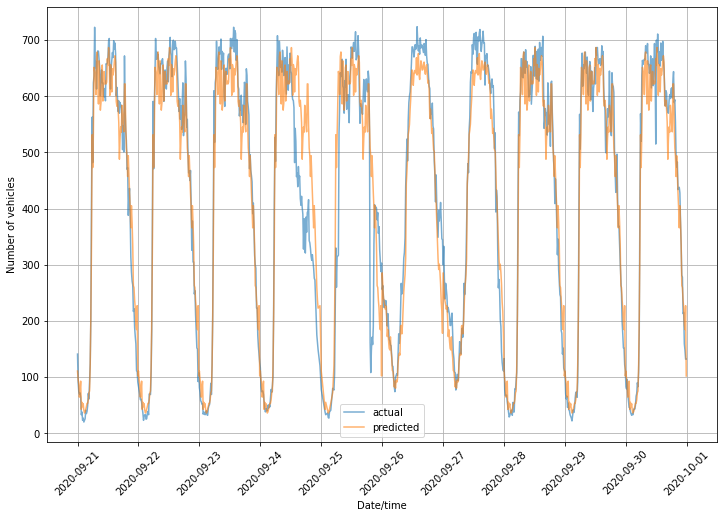

In [117]:
res = y_test.reset_index()
res['Predicted'] = predicted
res = res.set_index('StartTime').rename(columns={'NumberOfVehicles':'Actual'})

plt.figure(figsize=(12, 8))
plt.plot(res['Actual'], label='actual', alpha=0.6)
plt.plot(res['Predicted'], label='predicted', alpha=0.6)
plt.legend()
plt.grid()
plt.xlabel('Date/time')
plt.xticks(rotation=45)
plt.ylabel('Number of vehicles')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

PLs = [f'PL_{i:02}' for i in range(21)]

# standardize PL features
scaler = StandardScaler()
d2[PLs] = scaler.fit_transform(d2[PLs])
print(d2)

                StartTime  Band  CellId     PL_00     PL_01     PL_02  \
0     2020-08-01 00:00:00  2600      20 -0.015598 -0.029323 -0.044648   
1     2020-08-01 00:00:00  1800      21 -0.015598 -0.029323 -0.044648   
2     2020-08-01 00:00:00   800      22 -0.015598 -0.029323 -0.044648   
3     2020-08-01 00:00:00  1800      24 -0.015598 -0.029323 -0.044648   
4     2020-08-01 00:15:00  2600      20 -0.015598 -0.029323 -0.044648   
...                   ...   ...     ...       ...       ...       ...   
23411 2020-09-30 23:30:00  1800      24 -0.015598 -0.029323 -0.044648   
23412 2020-09-30 23:45:00  2600      20 -0.015598 -0.029323 -0.044648   
23413 2020-09-30 23:45:00  1800      21 -0.015598 -0.029323 -0.044648   
23414 2020-09-30 23:45:00   800      22 -0.015598 -0.029323 -0.044648   
23415 2020-09-30 23:45:00  1800      24 -0.015598 -0.029323 -0.044648   

          PL_03     PL_04     PL_05     PL_06  ...     PL_11     PL_12  \
0     -0.074367 -0.119627 -0.334975 -0.142488  ..

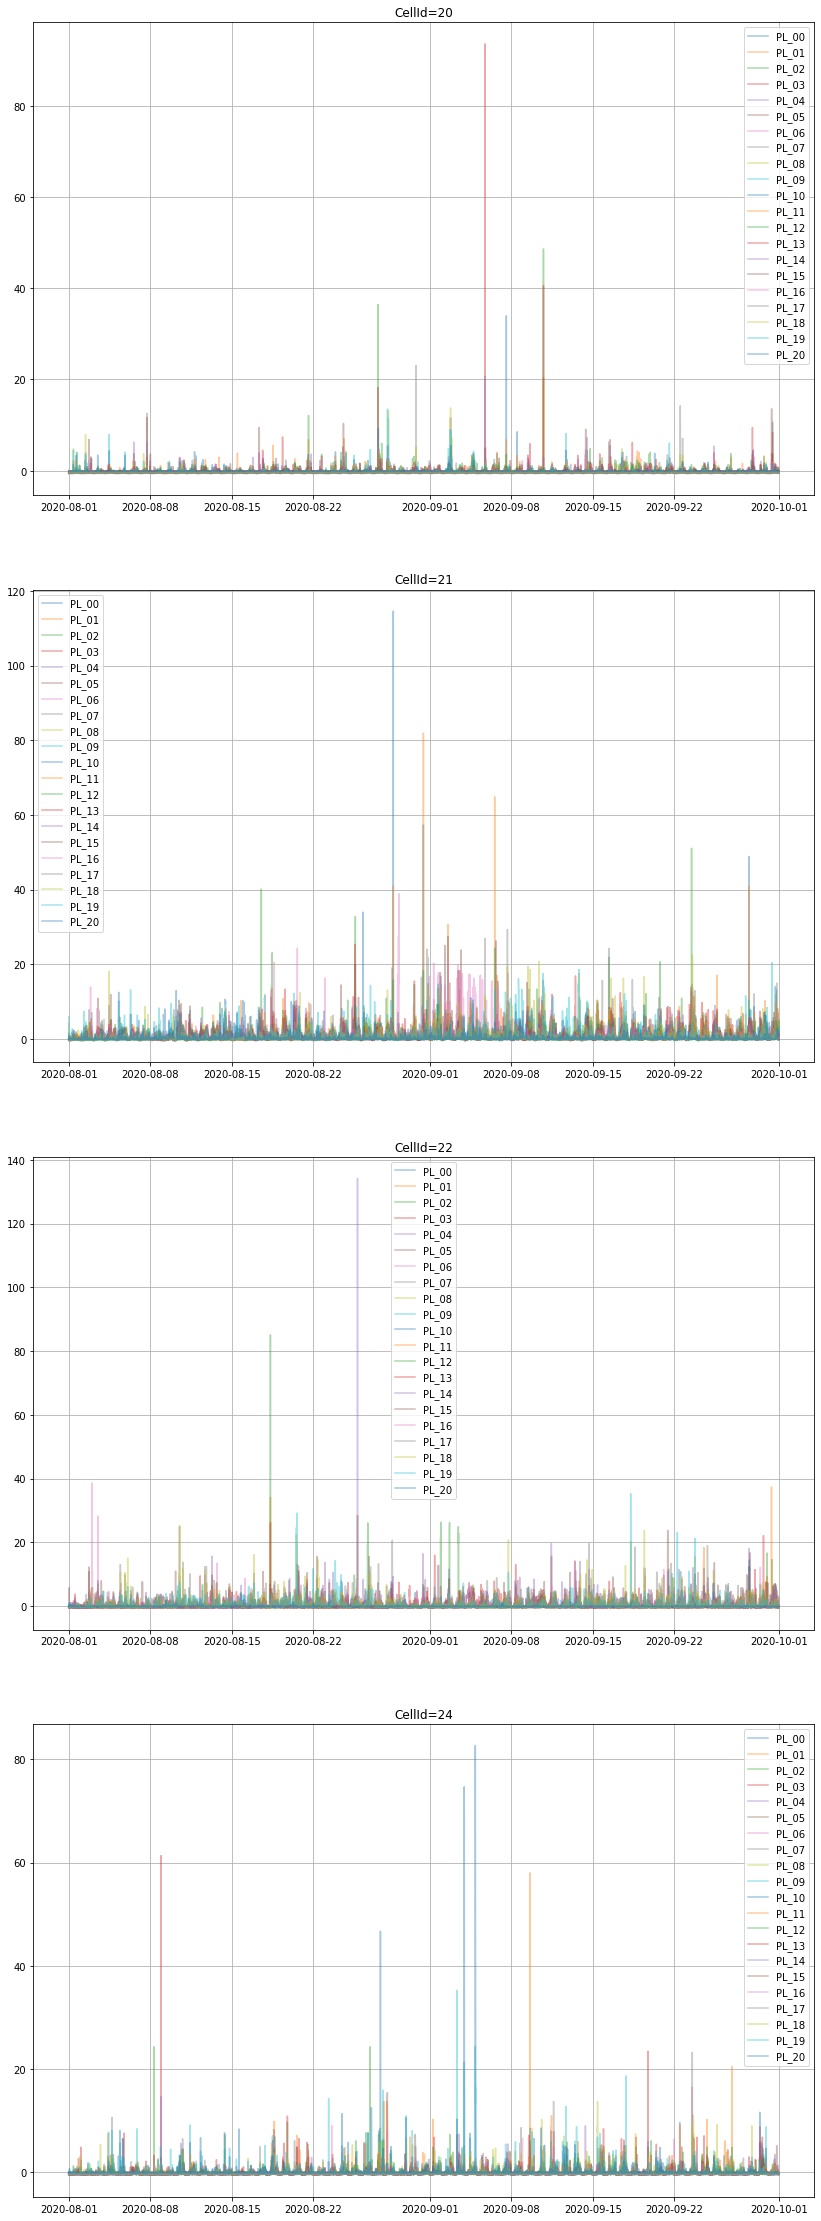

In [35]:
import matplotlib.pyplot as plt

d2_20 = d2[d2['CellId'] == 20].set_index('StartTime')
d2_21 = d2[d2['CellId'] == 21].set_index('StartTime')
d2_22 = d2[d2['CellId'] == 22].set_index('StartTime')
d2_24 = d2[d2['CellId'] == 24].set_index('StartTime')
    
fig = plt.figure(figsize=(14, 40))

fig.add_subplot(411)
for pl in PLs:
    plt.plot(d2_20[pl], label=pl, alpha=0.4)
plt.grid()
plt.legend()
plt.title('CellId=20')

fig.add_subplot(412)
for pl in PLs:
    plt.plot(d2_21[pl], label=pl, alpha=0.4)
plt.grid()
plt.legend()
plt.title('CellId=21')

fig.add_subplot(413)
for pl in PLs:
    plt.plot(d2_22[pl], label=pl, alpha=0.4)
plt.grid()
plt.legend()
plt.title('CellId=22')

fig.add_subplot(414)
for pl in PLs:
    plt.plot(d2_24[pl], label=pl, alpha=0.4)
plt.grid()
plt.legend()
plt.title('CellId=24')

plt.show()

In [37]:
# PL features are only available from 2020-08-01 to 2020-09-30, while targets (vehicle counts) 
# are available from 2020-04-01; let's collapse df to those two months where both features and 
# targets are available
#d2 = d2.set_index('StartTime')
#d2['NumberOfVehicles'] = d.set_index('StartTime')['NumberOfVehicles']
#d2 = d2.dropna().reset_index()
#print(d2)

                StartTime  Band  CellId     PL_00     PL_01     PL_02  \
0     2020-08-01 00:00:00  2600      20 -0.015598 -0.029323 -0.044648   
1     2020-08-01 00:00:00  1800      21 -0.015598 -0.029323 -0.044648   
2     2020-08-01 00:00:00   800      22 -0.015598 -0.029323 -0.044648   
3     2020-08-01 00:00:00  1800      24 -0.015598 -0.029323 -0.044648   
4     2020-08-01 00:15:00  2600      20 -0.015598 -0.029323 -0.044648   
...                   ...   ...     ...       ...       ...       ...   
22967 2020-09-30 23:30:00  1800      24 -0.015598 -0.029323 -0.044648   
22968 2020-09-30 23:45:00  2600      20 -0.015598 -0.029323 -0.044648   
22969 2020-09-30 23:45:00  1800      21 -0.015598 -0.029323 -0.044648   
22970 2020-09-30 23:45:00   800      22 -0.015598 -0.029323 -0.044648   
22971 2020-09-30 23:45:00  1800      24 -0.015598 -0.029323 -0.044648   

          PL_03     PL_04     PL_05     PL_06  ...     PL_12     PL_13  \
0     -0.074367 -0.119627 -0.334975 -0.142488  ..